This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


## 1. Data Sourcing


In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
#import statements
import numpy as np,pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
applications = pd.read_csv("application_data.csv")
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Data Cleaning 

1. Analyzing columns for missing data. Dropping columns as required with respect to missing data percentage
2. Imputing incorrect values
3. Handling missing values with very few nulls
4. Fixing rows and columns as per data required for analysis
5. Checking for outliers and suggested treatments
6. Binning the Continuous Variables

Expected output: Final dataset for analysis

### 2.1 Analyzing columns for missing data. Dropping columns as required with respect to missing data percentage

In [5]:
# checking the structure of the dataset
applications.shape

(307511, 122)

In [6]:
# setting the option so we can all the columns available.
pd.set_option('display.max_columns', 122)

# setting the option to show all columns when its information displayed in rows e.g. null checks
pd.set_option('display.max_rows', 122) 

In [7]:
# checking the structure of the dataset
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# checking the structure of the dataset
applications.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
applications.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#Checking the first 60 columns dtypes
applications.iloc[:,0:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [73]:
#Checking the remaining columns dtypes
applications.iloc[:,60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_MODE  157504 non-null  float64
 1   YEARS_BUILD_MODE              103023 non-null  float64
 2   COMMONAREA_MODE               92646 non-null   float64
 3   ELEVATORS_MODE                143620 non-null  float64
 4   ENTRANCES_MODE                152683 non-null  float64
 5   FLOORSMAX_MODE                154491 non-null  float64
 6   FLOORSMIN_MODE                98869 non-null   float64
 7   LANDAREA_MODE                 124921 non-null  float64
 8   LIVINGAPARTMENTS_MODE         97312 non-null   float64
 9   LIVINGAREA_MODE               153161 non-null  float64
 10  NONLIVINGAPARTMENTS_MODE      93997 non-null   float64
 11  NONLIVINGAREA_MODE            137829 non-null  float64
 12  APARTMENTS_MEDI               151450 non-nul

In [12]:
# function to find the % of null values in a column. This is shown in the descending order.

def findnull(df):
    totalnull = df.isnull().sum().sort_values(ascending = False)
    percentnull = (df.isnull().sum()/len(df.index)*100).sort_values(ascending = False)
    nullinfo = pd.concat([totalnull,percentnull],axis=1)
    colnames = ['Total','%']
    nullinfo.columns = colnames
    return nullinfo

# Fetching the 60 top columns
findnull(applications).head(60)

,Total,%
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


__As observed above, a large number of columns have over 50% data missing. These columns will be dropped from the final dataset.__

In [13]:
# creating a list of columns with 50% or more null values in them.

percentnull = pd.DataFrame((applications.isnull().sum()/len(applications.index)*100).sort_values(ascending = False),columns = ['%'])
null50 =list(percentnull[percentnull['%']>50].index)
len(null50)
len(applications.columns)-len(null50)

# using the above list dropping these columns.

targetDataset=applications.drop(applications[applications.loc[:,null50].columns],axis=1)

In [14]:
# checking the structure after dropping the columns.
targetDataset.shape

(307511, 81)

In [15]:
# checking the Column list after dropping the columns.
targetDataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

**_From provided description, the following columns do not provide much clarity and hence don't appear relevant to the analysis:_**

'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'

**_Dropping these columns from the target dataset_**

In [16]:
# dropping the above mentioned columns
targetDataset.drop(targetDataset.columns[targetDataset.columns.get_loc("YEARS_BEGINEXPLUATATION_AVG"):
                                       targetDataset.columns.get_loc("DEF_60_CNT_SOCIAL_CIRCLE")+1], axis=1,inplace=True)
targetDataset.drop(targetDataset.columns[targetDataset.columns.get_loc("FLAG_DOCUMENT_2"):
                                       targetDataset.columns.get_loc("FLAG_DOCUMENT_21")+1], axis=1,inplace=True)

In [17]:
# checking the structure after dropping the columns.
targetDataset.shape

(307511, 49)

**Columns with large amount of missing data is now cleared, and we have a target dataset to be analyzed and cleaned as per data**

### 2.2 Imputing incorrect values

In [74]:
# checking DAYS_EMPLOYED Column
targetDataset.DAYS_EMPLOYED.describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

NAME_INCOME_TYPE
Businessman              -2874.300000
Commercial associate     -2129.274027
Maternity leave          -2636.800000
Pensioner               365176.133052
State servant            -3450.871124
Student                  -2494.833333
Unemployed              365243.000000
Working                  -2353.121638
Name: DAYS_EMPLOYED, dtype: float64


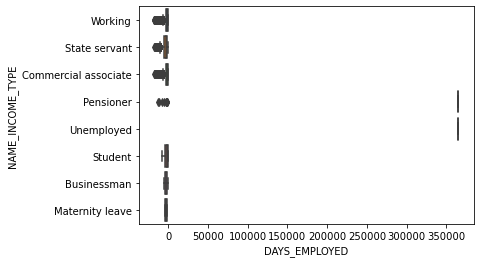

In [19]:
#checking with Days_employed in context to Income Type groups 
print(targetDataset.groupby('NAME_INCOME_TYPE')['DAYS_EMPLOYED'].mean())
sns.boxplot(x='DAYS_EMPLOYED', y = 'NAME_INCOME_TYPE' , data=targetDataset)

**As observed,** 
1. Maximum value for DAYS_EMPLOYED is 365243 = 1000+ years.
2. All values relate to either Pensioners or Unemployed customers.
3. The value 365243 is an ***outlier*** and needs to be imputed
<br>

**This data can cause severe skewing and it might be better to impute these values to np.Nan**

In [20]:
targetDataset['DAYS_EMPLOYED'] = targetDataset['DAYS_EMPLOYED'].replace(365243,np.nan)

In [21]:
targetDataset.DAYS_EMPLOYED.describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

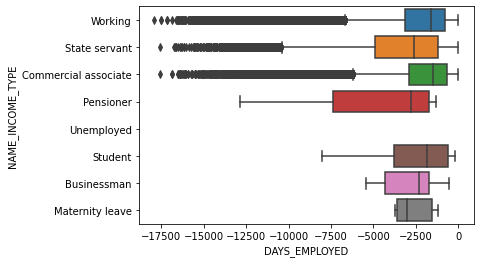

In [22]:
#checking with Days_employed in context to Income Type groups after the clean-up

sns.boxplot(x='DAYS_EMPLOYED', y = 'NAME_INCOME_TYPE' , data=targetDataset)

**This seems more reasonable since Days Employed at current place of employment for a customer who is unemployed is 0.**

In [23]:
#checking the Top % null values in the dataset.
findnull(targetDataset)

,Total,%
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
DAYS_EMPLOYED,55374,18.007161
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148


### 2.3 Handling missing values with very few nulls

In [24]:
# targetDataset.dropna(subset=['CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_GOODS_PRICE'],inplace=True)

In [25]:
# checking the Days Last phone change 
targetDataset.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

**Since only one value is missing for this column, it might be advisable to impute data with median value i.e. -757**

In [26]:
# checking the count of Family members 
targetDataset.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

**While the standard deviation does not appear too high, the minimum and maximum range between 1 and 20. Since only 2 values are missing for this column, it might be advisable to impute data with median value i.e. 2**


In [27]:
# checking the Annuity Amount
targetDataset.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

**Since the standard deviation is quite high, and 12 values are missing, amounting to 0.003902%, it might be advisable to impute data with median value i.e. 24903**

In [28]:
# checking the External Source 2 column
targetDataset.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

**Since the standard deviation is quite high, and 660 values are missing, amounting to 0.214626%, it might be advisable to impute data with median value i.e. 5.659614e-01**

In [29]:
# checking the dtype for Name type suite in the dataset 
targetDataset.NAME_TYPE_SUITE.dtype

dtype('O')

In [30]:
# checking the Name type suite for the dataset 
targetDataset.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

**For a categorical variable as seen above, it is advisable to impute missing values with mode (or most common value) i.e. 'Unaccompanied'**

### 2.4 Fixing rows and columns as per data required for analysis

* Checking for columns with negative and date type columns which need correction

In [31]:
# converting Birth in Days to Years and adding a new column Age to store it
targetDataset['Age']=round(targetDataset.DAYS_BIRTH/-365)
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0


In [32]:
# Similarly converting Days Employed to Years and adding a new column Tenure to store it
targetDataset['Tenure']=round(targetDataset.DAYS_EMPLOYED/-365)
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0


In [33]:
# checking Days since Registration
targetDataset.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [34]:
# Converting Days since Registration to Years and adding a new column YearRegistran to store it
targetDataset['YearRegistran']=round(targetDataset.DAYS_REGISTRATION/-365)
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0


In [35]:
# checking Days since ID was published by Customer
targetDataset.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [36]:
# Converting Days since ID was published by Customer to Years and adding a new column YearID to store it
targetDataset['YearID']=round(targetDataset.DAYS_ID_PUBLISH/-365)
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0,7.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0


**We now have our target database. We will be using this for further analysis**

### 2.5 Checking for outliers in Numerical Columns and recommending possible treatment for them.

In [37]:
targetDataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,252137.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,252137.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,-2384.169325,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.938646,6.532695,13.659440,8.198575
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,2338.360162,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.964047,6.411589,9.659369,4.151520
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-3175.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,2.000000,6.000000,5.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1648.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,5.000000,12.000000,9.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-767.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,54.000000,9.000000,20.000000,12.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0

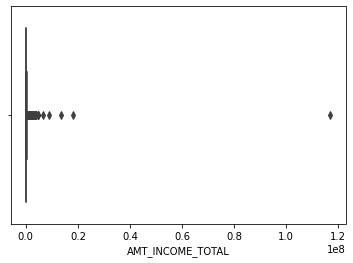

In [38]:
## checking for outliers - Amount income Total
sns.boxplot( data =targetDataset , x='AMT_INCOME_TOTAL');

**_The Total income Amount for a Customers shows outliers which can be treated for better analysis of the majority of the Customer population_**

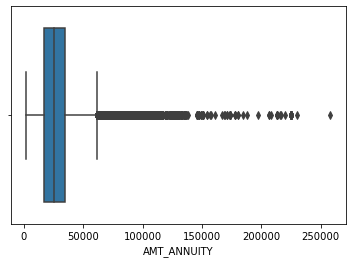

In [39]:
## checking for outliers - Annuity Amount
sns.boxplot( data =targetDataset , x='AMT_ANNUITY');

**_For Analysis we can since we can see a large number of outliers beyond 75% percentile_**

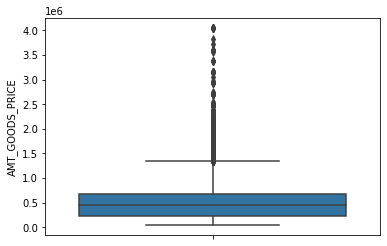

In [40]:
## checking for outliers -Amount Goods Price
sns.boxplot( data =targetDataset , y='AMT_GOODS_PRICE');

**_For the Good Price Amount we can since possible treatment of the large number of outliers beyond 75% percentile_**

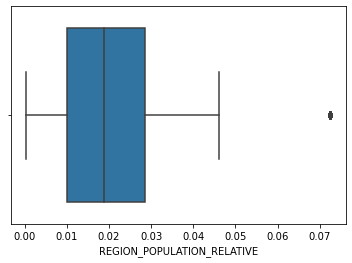

In [41]:
## checking for outliers -Normalized population of region where client lives  
sns.boxplot( data =targetDataset , x='REGION_POPULATION_RELATIVE');

**_For the REGION_POPULATION_RELATIVE we can outliers which can be treated_**

### 2.6 Binning Continuous Variables

* Bins will created for these Variables and used later during the Data analyis phase.

In [42]:
# the Tenure for the Customers can be broken down into categories i.e. bins
targetDataset.Tenure.describe()

count    252137.000000
mean          6.532695
std           6.411589
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          49.000000
Name: Tenure, dtype: float64

In [43]:
# Creating the Bins for the Tenure Column
targetDataset['TenureBins']=pd.cut(targetDataset.Tenure,[0,10,20,30,40,50,100],
                  labels=['<10','10-20','20-30','30-40','40-50','50+'])

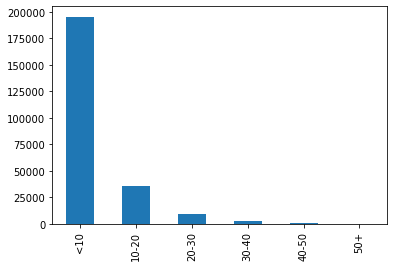

In [44]:
#plotting bar plot after Binning Tenure Column
targetDataset.TenureBins.value_counts().plot.bar();

**_From the above Graph Customers with Tenure less than 10 years have taken the maximum Loans and beyond 40+ have been the minimum_**

In [45]:
# the Amount Income of the Customers can be broken down into categories i.e. bins
targetDataset.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [46]:
# Creating the Bins for the Amount Income Column
targetDataset['Incomebins']=pd.cut(targetDataset.AMT_INCOME_TOTAL,[0,50000,100000,150000,200000,300000,400000,5.0e9],
                  labels=['<50000','50000-100000','100000-150000','150000-200000','200000-300000','300000-400000','400000+'])

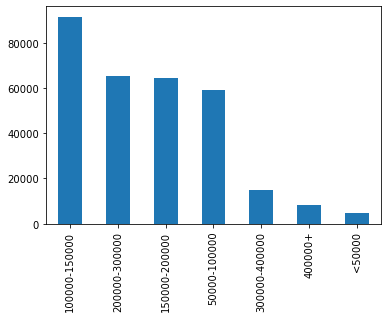

In [47]:
#plotting bar plot after Binning Amount Income Column
targetDataset.Incomebins.value_counts().plot.bar();

**_From the above Graph Customers with Income between 1L-1.5L have taken the maximum Loans and those with Income less than 0.5L have been the minimum_**

In [48]:
# the Amount Annuity of the Customers can be broken down into categories i.e. bins
targetDataset.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [49]:
# Creating the Bins for the Amount Annuity Column
targetDataset['AnnuityBins']=pd.cut(targetDataset.AMT_ANNUITY,[0,25000,50000,75000,100000,125000,150000,300000000],
                  labels=['<25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000+'])

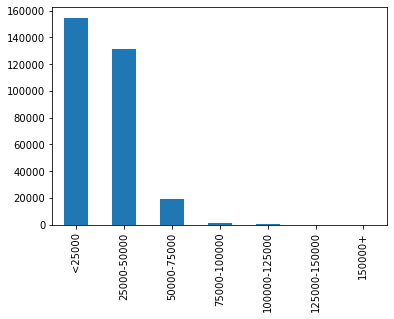

In [50]:
#plotting bar plot after Binning Amount Annuity Column
targetDataset.AnnuityBins.value_counts().plot.bar();

**_From the above Graph regarding Annuity options taken by Customers is seen highest for less than 2500 group and lowest is for the 1.5L Group_**

In [51]:
targetDataset.AMT_CREDIT.quantile([0.25,0.5, 0.7, 0.9, 0.95, 0.99])

0.25     270000.0
0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [52]:
targetDataset['CreditBins']=pd.cut(targetDataset.AMT_CREDIT,[0,270000,513531,755190,1133748,1350000,9999999999],
                  labels=['<270000','270000-513531','513531-755190','755190-1133748','1133748-1350000','1350000+'])
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID,TenureBins,Incomebins,AnnuityBins,CreditBins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,<10,200000-300000,<25000,270000-513531
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,<10,200000-300000,25000-50000,1133748-1350000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,<10,50000-100000,<25000,<270000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0,7.0,<10,100000-150000,25000-50000,270000-513531
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,<10,100000-150000,<25000,270000-513531


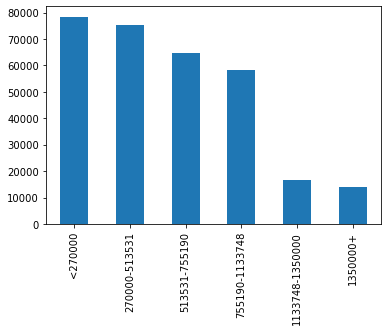

In [53]:
targetDataset.CreditBins.value_counts().plot.bar();

**_From the above Graph Customers with Credit <27000 have taken the maximum Loans and beyond 1350000+ have been the minimum_**`

In [54]:
targetDataset['AGEBINS']=pd.cut(targetDataset.Age,[20,30,40,50,60,150],
                  labels=['<30','30-40','40-50','50-60','60+'])
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID,TenureBins,Incomebins,AnnuityBins,CreditBins,AGEBINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,<10,200000-300000,<25000,270000-513531,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,<10,200000-300000,25000-50000,1133748-1350000,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,<10,50000-100000,<25000,<270000,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0,7.0,<10,100000-150000,25000-50000,270000-513531,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,<10,100000-150000,<25000,270000-513531,50-60


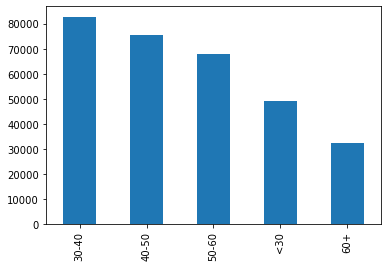

In [55]:
targetDataset.AGEBINS.value_counts().plot.bar();

**_From the above Graph Customers with Age between 30 and 40 years have taken the maximum Loans and beyond 60+ have been the minimum_**

In [56]:
targetDataset['RegionPopulationBins']=pd.cut(targetDataset['REGION_POPULATION_RELATIVE'],[0,0.01,0.02,0.03,0.04,0.05,0.06,0.10],
                  labels=['<0.01','0.01-0.02','0.02-0.03','0.03-0.04','0.04-0.05','0.05-0.06','0.06+'])
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID,TenureBins,Incomebins,AnnuityBins,CreditBins,AGEBINS,RegionPopulationBins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,<10,200000-300000,<25000,270000-513531,<30,0.01-0.02
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,<10,200000-300000,25000-50000,1133748-1350000,40-50,<0.01
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,<10,50000-100000,<25000,<270000,50-60,0.01-0.02
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0,7.0,<10,100000-150000,25000-50000,270000-513531,50-60,<0.01
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,<10,100000-150000,<25000,270000-513531,50-60,0.02-0.03


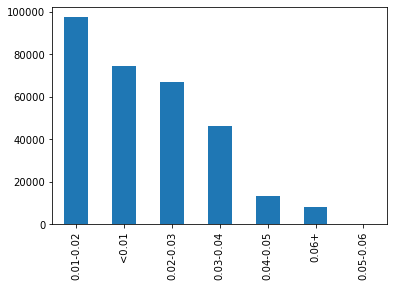

In [57]:
targetDataset.RegionPopulationBins.value_counts().plot.bar();

**_From the above Graph Customers with Region Population between 0.01 and 0.02 years have taken the maximum Loans_**

In [58]:
targetDataset['RegistrationBins']=pd.cut(targetDataset.YearRegistran,[0,10,20,30,40,50,60,150],labels=['<10','10-20','20-30','30-40','40-50','50-60','60+'])
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID,TenureBins,Incomebins,AnnuityBins,CreditBins,AGEBINS,RegionPopulationBins,RegistrationBins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,<10,200000-300000,<25000,270000-513531,<30,0.01-0.02,<10
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,<10,200000-300000,25000-50000,1133748-1350000,40-50,<0.01,<10
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,<10,50000-100000,<25000,<270000,50-60,0.01-0.02,10-20
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0,7.0,<10,100000-150000,25000-50000,270000-513531,50-60,<0.01,20-30
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,<10,100000-150000,<25000,270000-513531,50-60,0.02-0.03,10-20


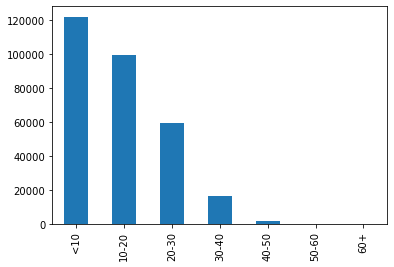

In [59]:
targetDataset.RegistrationBins.value_counts().plot.bar();

**_From the above Graph Customers with Registration Bins less than 10 years have taken the maximum Loans_**

In [60]:
targetDataset['IDBins']=pd.cut(targetDataset.YearID,[0,3,6,9,12,15,18,25],
                       labels=['<3','3-6','6-9','9-12','12-15','15-18','18+'])
targetDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Tenure,YearRegistran,YearID,TenureBins,Incomebins,AnnuityBins,CreditBins,AGEBINS,RegionPopulationBins,RegistrationBins,IDBins
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,10.0,6.0,<10,200000-300000,<25000,270000-513531,<30,0.01-0.02,<10,3-6
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,3.0,1.0,<10,200000-300000,25000-50000,1133748-1350000,40-50,<0.01,<10,<3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,12.0,7.0,<10,50000-100000,<25000,<270000,50-60,0.01-0.02,10-20,6-9
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,27.0,7.0,<10,100000-150000,25000-50000,270000-513531,50-60,<0.01,20-30,6-9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,12.0,9.0,<10,100000-150000,<25000,270000-513531,50-60,0.02-0.03,10-20,6-9


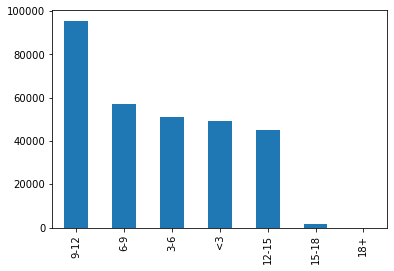

In [61]:
targetDataset.IDBins.value_counts().plot.bar();

**_From the above Graph Customers with ID Bins between than 9 and 12 years have taken the maximum Loans_**

In [62]:
targetDataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

## 3. Data Analysis

1. Univariate and Bivariate Analysis with plots
2. Inferences and suggestions

In [63]:
# checking the Target column and the imbalance is present or not
targetDataset.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

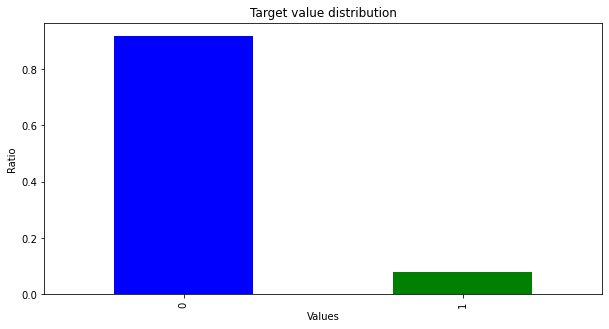

In [64]:
# Target column in terms of Ratio 
targetDataset.TARGET.value_counts(normalize=True).plot.bar(figsize=[10,5],color=['b','g'])
plt.title("Target value distribution")
plt.ylabel('Ratio')
plt.xlabel('Values')
plt.show()

**IMBALANCED DATASET : It can be observed that Target value distribution as well as value counts shows a major imbalance in data with values with Target = 0 being over 10 times that of data with Target = 1**

In [65]:
fields = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','Age']
fields1= ['Tenure','YearRegistran','YearID','CNT_FAM_MEMBERS']

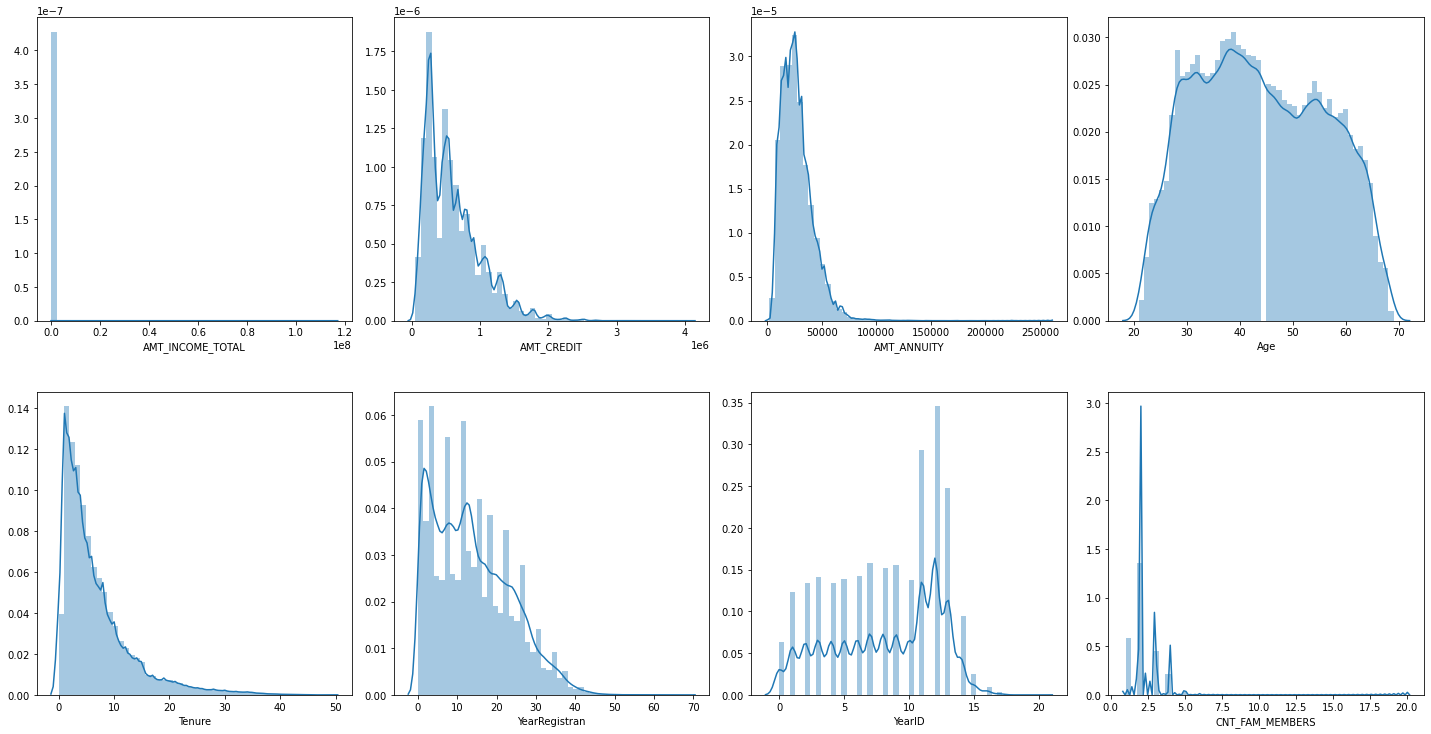

In [66]:
f, axes = plt.subplots(2,4, figsize=(20,10))
plt.tight_layout(h_pad=5) 
for i,t in enumerate(fields):

    sns.distplot(targetDataset[t],ax=axes[0,i] )

for i,t in enumerate(fields1):

    sns.distplot(targetDataset[t],ax=axes[1,i] )
plt.show()

In [67]:
# Creating 2 Dataframe for Target =1 and Target = 0 
Target0 = targetDataset[targetDataset.TARGET==0]
Target1 = targetDataset[targetDataset.TARGET==1]

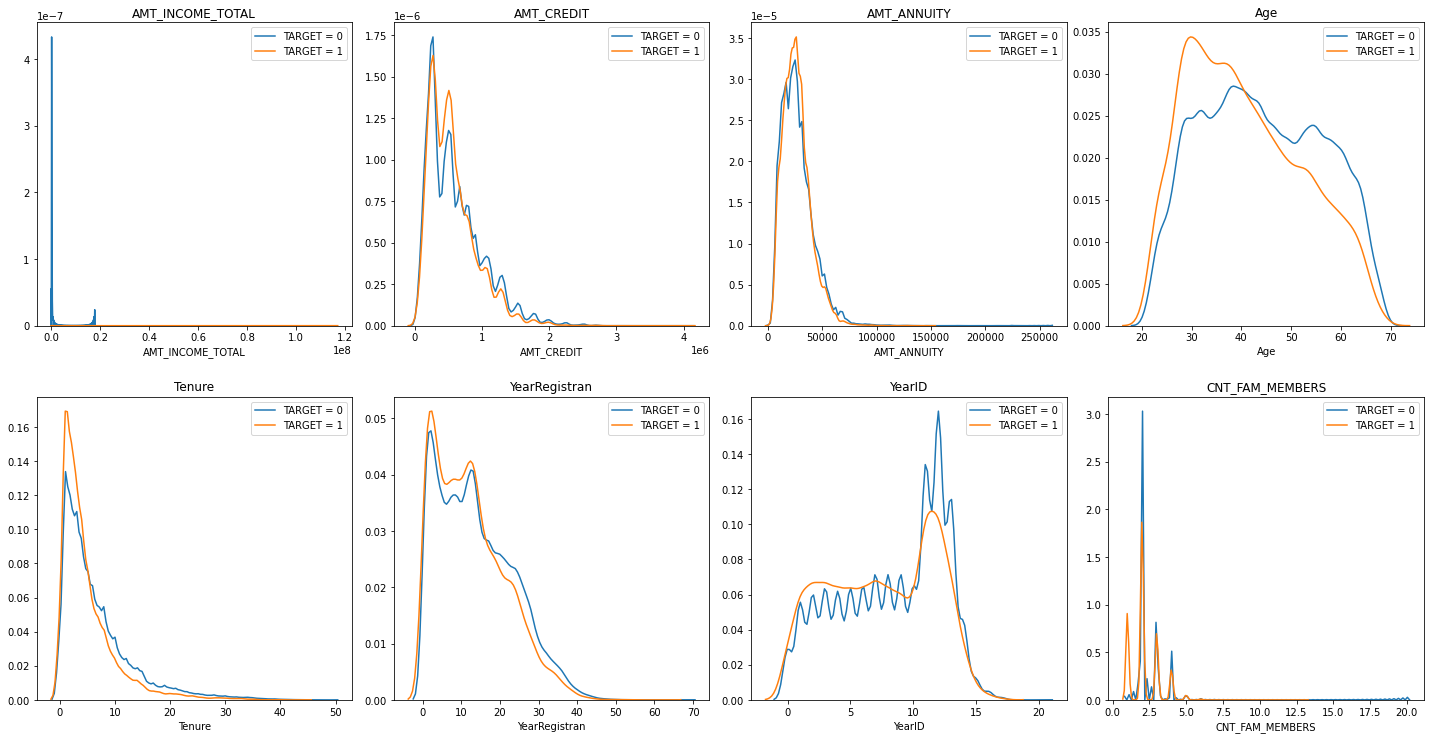

In [68]:
f, axes = plt.subplots(2,4, figsize=(20,10))
plt.tight_layout(h_pad=5) 
for i,t in enumerate(fields):
    ax1=sns.distplot(Target0[t],label='TARGET = 0',ax=axes[0,i],hist=False)
    sns.distplot(Target1[t],label='TARGET = 1',ax=axes[0,i],hist=False)
    ax1.set_title(t, fontsize=12)
    
for i,t in enumerate(fields1):
    ax2=sns.distplot(Target0[t],label='TARGET = 0',ax=axes[1,i],hist=False)
    sns.distplot(Target1[t],label='TARGET = 1',ax=axes[1,i],hist=False)
    ax2.set_title(t, fontsize=12)

plt.show()

In [69]:
def subpltDisplay(field):
#     print(field)
    vals0 = Target0[field].value_counts()
    TargetByField = Target1[field].value_counts()
    plt.tight_layout()
#     plt.figure(figsize=[20,15])
#     plt.title(field, fontsize=12)
    
    fig,ax=plt.subplots(1,2)
#     plt.title(field)
    val1 = vals0.plot.bar(figsize=[20,5],ax=ax[0],color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
    val1.set_xlabel(field)
    val1.set_ylabel('Customer Count: Target = 0')    
    
    targ = TargetByField.plot.bar(figsize=[20,5],ax=ax[1],color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
#     val1.set_xlabel(field)
    targ.set_ylabel('Customer Count: Target = 1')
    
    plt.show()

In [70]:
def boxsubpltDisplay(field):
#     print(field)
    vals0 = Target0[field]
    TargetByField = Target1[field]
    plt.tight_layout()
#     plt.figure(figsize=[20,15])
#     plt.title(field, fontsize=12)
    
    fig,ax=plt.subplots(1,2)
#     plt.title(field)
    val1 = vals0.plot.box(figsize=[20,5],ax=ax[0])
#     val1.set_xlabel(field)
    val1.set_ylabel('Customer Count: Target = 0')    
    
    targ = TargetByField.plot.box(figsize=[20,5],ax=ax[1])
#     val1.set_xlabel(field)
    targ.set_ylabel('Customer Count: Target = 1')
    
    plt.show()

**Creating Plots to compare the Catergorical columns for Target 0 and 1**

<Figure size 432x288 with 0 Axes>

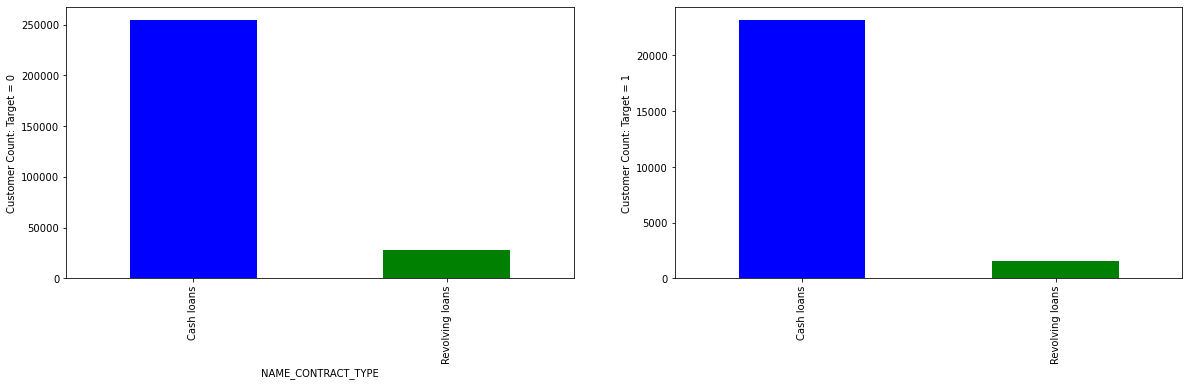

In [71]:
## Comparing the Types of Loans given
subpltDisplay('NAME_CONTRACT_TYPE')

**_Its observed that in both sets Cash Loans are higher as compared to Revolving Loans._**

In [72]:
vals0 = Target0('NAME_CONTRACT_TYPE')
plt.bar(figsize=[20,5],ax=ax[0],color=['b', 'g', 'r', 'c', 'm', 'y', 'k'],x='vals0',hue = 'Target',data = targetdataset)

TypeError: 'DataFrame' object is not callable

In [ ]:
## Comparing if Customer have their own car or not
subpltDisplay('FLAG_OWN_CAR')

**_Its observed that in both sets a higher number of Customers do not have their own cars_**

In [ ]:
## Comparing if Customer have their own house or not
subpltDisplay('FLAG_OWN_REALTY')

**_Its observed that in both sets a higher number of Customers do not have their own realty_**

In [ ]:
## Comparing Gender of Customers 
subpltDisplay('CODE_GENDER')

**_Its observed that in both sets a higher number of female Customers is observed_**

In [ ]:
## Comparing number of childern of the Customers
subpltDisplay('CNT_CHILDREN')

**_Its observed that in both sets a higher number of Customers have no children_**

In [ ]:
## Comparing number of Family members of the Customers
subpltDisplay('CNT_FAM_MEMBERS')

**_Its observed that in both sets a higher number of Customers have family count of 2_**

In [ ]:
## Comparing FAmily status of the Customers
subpltDisplay('NAME_FAMILY_STATUS')

**_Its observed that in both sets a higher number of Customers have a Family Status of 'Married'.
This also matches the previous observation indicating highest customers in both set having Family Size = 2_**

In [ ]:
def contnumericalAnalysis(field):
    print('Target0 \n',Target0[field].describe())
    print('Target1 \n',Target1[field].describe())
    boxsubpltDisplay(field)

In [ ]:
contnumericalAnalysis("AMT_INCOME_TOTAL")

***While the median values for both sets is different, the 25th and 75th quartile are same for both sets***

In [ ]:
## Comparing number of Income of the Customers
subpltDisplay('Incomebins') #bins AMT_INCOME_TOTAL

***Both data sets appear to have maximum customers with an income in the range 1-1.5 lakh'***

In [ ]:
contnumericalAnalysis("AMT_CREDIT")

***While the max credit amount in both sets seem to be in the same range, customers with higher credit amounts appear less likely to default***

In [ ]:
print(Target0.AMT_CREDIT.quantile([0.25,0.5, 0.7, 0.9, 0.95, 0.99]))
print(Target1.AMT_CREDIT.quantile([0.25,0.5, 0.7, 0.9, 0.95, 0.99]))

In [ ]:
subpltDisplay('CreditBins')  #bins AMT_CREDIT

***While most non-defaulting customers appear to have an credit <270000, most defaulting customers appear to have an credit in the range '270000-517788'***

In [ ]:
contnumericalAnalysis('AMT_ANNUITY')

***There appears to be an observable difference between the outliers range of the two sets. Defaulting customers appear to be restricted around the annuity amount of 150000, however, customers with much higher annuities - around 250000 appear to be non-defaulters***

In [ ]:
subpltDisplay('AnnuityBins')  #bins AMT_ANNUITY

**_Its observed that in both sets a higher number of Customers have <25000 as annuity amount_**

In [ ]:
subpltDisplay('NAME_INCOME_TYPE')

**_Its observed that in both sets a higher number of Customers have an Income Type = Working_**

In [ ]:
subpltDisplay('NAME_EDUCATION_TYPE')

**_Its observed that in both sets a higher number of Customers have secondary/secondary special education_**

In [ ]:
subpltDisplay('NAME_HOUSING_TYPE')

**_Its observed that in both sets a higher number of Customers live in a House/apartment. This also appears to reiterate the observation that customers with their own realty are higher in both sets_**

In [ ]:
contnumericalAnalysis('Age')

***While the minimum and maximum values Age in both sets is equal, the inter-quartile range (IQR) and median for defaulting customers is slightly lesser than that for non-defaulting customers***

In [ ]:
subpltDisplay('AGEBINS')# bins Age

**_Its observed that in both sets a higher number of Customers are in the age range of 30-40_**

In [ ]:
contnumericalAnalysis('Tenure')

***There appear to be large number of outliers for both datasets. However, the median value for Tenure value is lesser for defaulting customers***

In [ ]:
subpltDisplay('TenureBins')

***In both data sets, it appears that customers who have been with their current employers for leass han 10 years are highest***

In [ ]:
subpltDisplay('OCCUPATION_TYPE')

***Labourers seem to be the highest loan takers in both datasets***

In [ ]:
contnumericalAnalysis('REGION_POPULATION_RELATIVE')

***It appears that both sets have maximum relative region population around 0.07.Similarly, the IQR and medians are also quite close***

In [ ]:
subpltDisplay('RegionPopulationBins')

***Both data sets appear to have maximum customers in the bin 0.01-0.02***

In [ ]:
contnumericalAnalysis('YearRegistran')

***While both sets seem to have IQR and median around the same numbers, customers with Registration Years over 50 appear to be less likely to default***

In [ ]:
subpltDisplay('RegistrationBins')

***Both data sets appear to have highest customers in the registration bin <10***

In [ ]:
contnumericalAnalysis('YearID')

***There doesn't seem to be any direct correlation between Years since ID published and defaulting. Both sets have similar values for IQR, median as well as minimum and maximum values***

In [ ]:
subpltDisplay('IDBins')

***Most customers in both data sets appear to lie in the range 9-12 years since ID published***

***Looking at some Bivariate analysis using charts***

In [ ]:
Target0.describe(include=[object])


In [ ]:
Target1.describe(include=[object])

In [ ]:
Target0.head()

In [ ]:
Target1.head()

In [ ]:
def scattersubpltDisplay(field1,field2):
    
    plt.figure(figsize=[20,10])
    plt.tight_layout(h_pad=5) 
    
    fig,ax=plt.subplots(1,2, figsize=(20,10))

    val1=sns.scatterplot(data = Target0,x=field1, y = field2,ax=ax[0] ) 
    
    targ=sns.scatterplot(data = Target1,x=field1, y = field2,ax=ax[1] )
    
    plt.show()

In [ ]:
scattersubpltDisplay('AMT_INCOME_TOTAL','AMT_CREDIT')

***Both datasets indicate a high correlation between the two variables - AMT_INCOME_TOTAL and AMT_CREDIT. However there appear to be more outliers for non-defaulting customers in comparison to defaulting customers***

In [ ]:
scattersubpltDisplay('AMT_INCOME_TOTAL','CNT_FAM_MEMBERS')
# sns.scatterplot(data = targetDataset_AMT_INCOME,x='AMT_INCOME_TOTAL', y = 'CNT_FAM_MEMBERS' )

***Both datasets indicate a high correlation between the two variables - AMT_INCOME_TOTAL and CNT_FAM_MEMBERS. However there appear to be more outliers for non-defaulting customers in comparison to defaulting customers***

In [ ]:
scattersubpltDisplay('Age','CNT_FAM_MEMBERS')

***Both datasets indicate that there is no specific correlation between Age and Count of family members***

In [ ]:
scattersubpltDisplay('AMT_CREDIT','AMT_ANNUITY')

***The above plots indicate that as Amount Annuity increases, Amount of credit increases as well. This holds true for both datasets***

In [ ]:
targetDataset.TARGET.mean()

In [ ]:
def heatmapsubpltDisplay(field1="NAME_EDUCATION_TYPE",field2="CreditBins",field3='TARGET'):
    plt.figure(figsize=[10,10])
    res0=pd.pivot_table(data=targetDataset, index=field1, columns=field2, values=field3)
    val1=sns.heatmap(res0, annot=True ,cmap='Greens',center=0.080) 
    plt.show()

In [ ]:
heatmapsubpltDisplay("Incomebins","CreditBins")

***The above heatmap indicates that there is not much of a correlation between Income and Credit bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.4***

In [ ]:
heatmapsubpltDisplay("NAME_EDUCATION_TYPE","CreditBins")

***The above heatmap indicates that there is very low correlation between Education of customer and Credit bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.15***

In [ ]:
heatmapsubpltDisplay("Incomebins","NAME_EDUCATION_TYPE")


***The above heatmap indicates that there is very low correlation between Education of customer and Income bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.13***

In [ ]:
heatmapsubpltDisplay("OCCUPATION_TYPE","Incomebins")


***The above heatmap indicates that there is very low correlation between Occupation Type of customer and Income bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.24***

In [ ]:
heatmapsubpltDisplay("OCCUPATION_TYPE","AGEBINS") 

***The above heatmap indicates that there is very low correlation between Occupation of customer and Age bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.2***

In [ ]:
heatmapsubpltDisplay("OCCUPATION_TYPE","REG_REGION_NOT_WORK_REGION") 

***The above heatmap indicates that there is very low correlation between Occupation of customer and Registration region is not same as work region when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.17***

In [ ]:
heatmapsubpltDisplay("AGEBINS","NAME_CONTRACT_TYPE") 

***The above heatmap indicates that there is very low correlation between Contract Type and Age bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.12***

In [ ]:
heatmapsubpltDisplay("CreditBins","RegistrationBins") 

***The above heatmap indicates that there is low correlation between Registration bins and Credit bins when plotted against the target database (i.e. both Target values 0 and 1. Maximum correlation observed = 0.5***

In [ ]:
#Correlation matrix for target database
df = targetDataset.corr()
plt.figure(figsize=[40,40])
sns.heatmap(data=df,annot=True,cmap='Greens',vmin=0.7,vmax=1);

***The above heatmap indicates that the following columns appear to have a high correlation:***
1. REG_REGION_NOT_WORK_REGION vs LIVE_REGION_NOT_WORK_REGION
2. REG_REGION_NOT_LIVE_REGION vs LIVE_REGION_NOT_WORK_REGION
3. REG_CITY_NOT_WORK_CITY vs LIVE_CITY_NOT_WORK_CITY
4. AMT_CREDIT vs AMT_GOODS_PRICE
5. AMT_ANNUITY vs AMT_GOODS_PRICE


In [ ]:
#finding correlations in the split datasets using the fields observed above
corrfields =['REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']
corrdf0=Target0[Target0.loc[:,corrfields].columns]
corrdf1=Target1[Target1.loc[:,corrfields].columns]

In [ ]:
#plotting correlation matrix for Target0
corrdf0.corr()

In [ ]:
#Plotting correlation matrix for Target1
corrdf1.corr()

In [ ]:
#Plotting heatmaps using correlation matrix
plt.tight_layout(w_pad=5)
fig,ax=plt.subplots(2,1,figsize=[35,20])
val1 = sns.heatmap(data=corrdf0.corr(),annot=True,cmap='Greens',ax=ax[0])
targ = sns.heatmap(data=corrdf1.corr(),annot=True,cmap='Greens',ax=ax[1])
plt.show()

***From the above diagram the same fields appear to have similar correlations in both the split data sets***
1. REG_REGION_NOT_WORK_REGION vs LIVE_REGION_NOT_WORK_REGION
2. REG_REGION_NOT_LIVE_REGION vs LIVE_REGION_NOT_WORK_REGION
3. REG_CITY_NOT_WORK_CITY vs LIVE_CITY_NOT_WORK_CITY
4. AMT_CREDIT vs AMT_GOODS_PRICE
5. AMT_ANNUITY vs AMT_GOODS_PRICE

In [ ]:
#Reading the previous applications file
prevapplications = pd.read_csv("previous_application.csv")
prevapplications.head()

In [ ]:
#Routine check of previous application file
prevapplications.info()

In [ ]:
findnull(prevapplications)

In [ ]:
finalDF = targetDataset.merge(prevapplications,on='SK_ID_CURR',how='left')

In [ ]:
finalDF.head()

In [ ]:
finalDF.shape

In [ ]:
#Splitting final dataframe for TARGET=0
finalDF0=finalDF[finalDF['TARGET']==0]
finalDF0.head()

In [ ]:
#Splitting final dataframe for TARGET=1
finalDF1=finalDF[finalDF['TARGET']==1]
finalDF1.head()

In [ ]:
subpltDisplay1("PRODUCT_COMBINATION")



***From above plot, both datasets indicate that customers preferred product combination Cash***

In [ ]:
# subpltDisplay1('NAME_CASH_LOAN_PURPOSE')
print(finalDF0.NAME_CASH_LOAN_PURPOSE.value_counts())
print(finalDF1.NAME_CASH_LOAN_PURPOSE.value_counts())

In [ ]:
subpltDisplay1('NAME_CONTRACT_STATUS')


***It appears from above plots that more loan applications were approved than refused in both data sets***

In [ ]:
subpltDisplay1('NAME_CLIENT_TYPE')


***Above plots indicate that higher number of customers for both sets were repeat customers***

In [ ]:
subpltDisplay1('NAME_GOODS_CATEGORY')


***Above plot indicates that Mobile appears to be the most common Goods category for both data sets***

In [ ]:
subpltDisplay1('CHANNEL_TYPE')


***From above plots 'Cash and colect offices' appear to be the most popular channel type for both data sets***

In [ ]:
subpltDisplay1('NAME_SELLER_INDUSTRY')


In [ ]:
subpltDisplay1('NAME_YIELD_GROUP')

***From above plots it appears that while middle yield group are more likely to be non-defaulters while high yield group appear to have a higher likelihood of being defaulters***

In [ ]:
def scattersubpltDisplay1(field1,field2):
    
    plt.figure(figsize=[20,10])
    plt.tight_layout(h_pad=5) 
    
    fig,ax=plt.subplots(1,2, figsize=(20,10))

    val1=sns.scatterplot(data = finalDF0,x=field1, y = field2,ax=ax[0] ) 
    
    targ=sns.scatterplot(data = finalDF1,x=field1, y = field2,ax=ax[1] )
    
    plt.show()

In [ ]:
scattersubpltDisplay1('AMT_CREDIT_y','AMT_APPLICATION')

***Above plot indicates a positive linear correlation between Amount of application and amount of credit especially post 1000000 credit***

In [ ]:
finalcorrfields =['PRODUCT_COMBINATION','AMT_CREDIT_y','AMT_APPLICATION','NAME_CONTRACT_STATUS'
                  ,'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']
finalcorrdf0=finalDF0[finalDF0.loc[:,finalcorrfields].columns]
finalcorrdf1=finalDF1[finalDF1.loc[:,finalcorrfields].columns]


In [ ]:
#plotting correlation matrix for Target0
finalcorrdf0.corr()

In [ ]:
#Plotting correlation matrix for Target1
finalcorrdf1.corr()

In [ ]:
#Plotting heatmaps using correlation matrix
plt.tight_layout(w_pad=5)
fig,ax=plt.subplots(1,2,figsize=[20,10])
val1 = sns.heatmap(data=finalcorrdf0.corr(),annot=True,cmap='Greens',ax=ax[0])
targ = sns.heatmap(data=finalcorrdf1.corr(),annot=True,cmap='Greens',ax=ax[1])
plt.show()

***The above plot indicates a strong correlation between Amount credit and amount application for both datasets***